## Waste Management using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import tqdm as tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

In [5]:
# importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
# Visualization
import glob
x_data = []
y_data = []
for category in glob.glob(train_path+'/*'):
    for file in tqdm.tqdm(glob.glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:11<00:00, 871.66it/s] 


In [9]:
data.shape

(22564, 2)

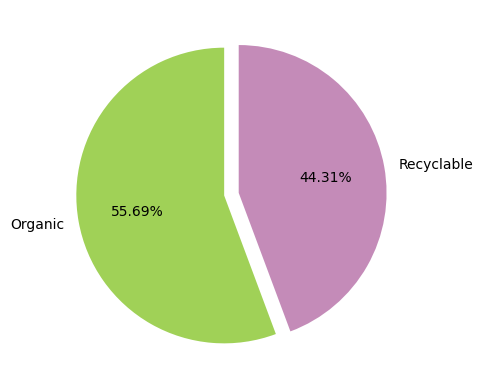

In [10]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle=90, explode=[0.05, 0.05])
plt.show()

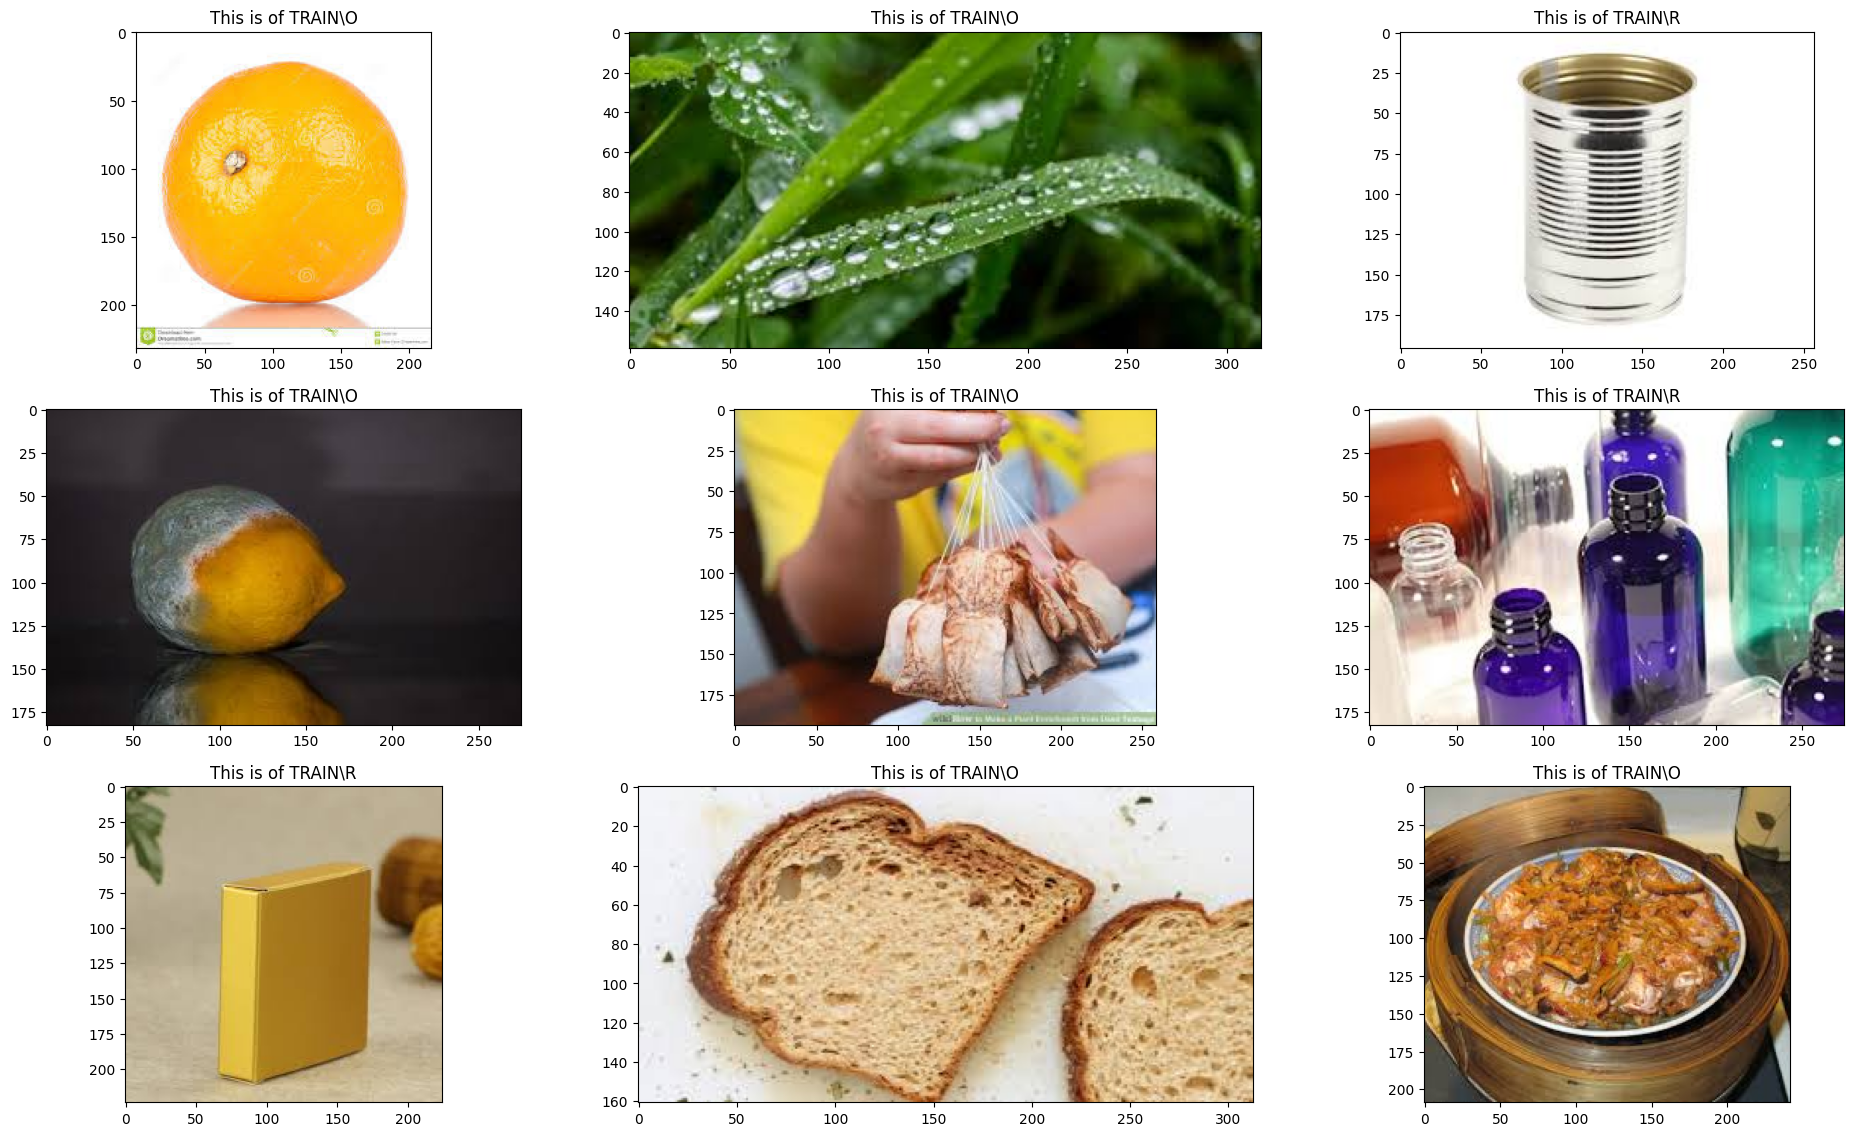

In [11]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib.pyplot as plt
#visualization chart
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN Convolutional Neural Network

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer (Fixed the error here)
model.add(Conv2D(64, (3, 3), padding='same'))  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer (Fixed the error here)
model.add(Conv2D(128, (3, 3), padding='same'))  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

model.add(Dense(64))
model.add(Activation('relu'))

# Output Layer (Binary Classification)
model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

batch_size = 32  # Defined batch size


c:\Users\Nishchitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,800,194 (98.42 MB)

 Trainable params: 25,800,194 (98.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=40,      # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,        # Randomly apply shear transformations
    zoom_range=0.2,         # Randomly zoom images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in missing pixels with the nearest value
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for the test data

# Paths to your training and testing datasets
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

batch_size = 32  # Set the batch size

# Create generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 5: Train the model
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)



Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.7793 - loss: 0.5168

c:\Users\Nishchitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.7794 - loss: 0.5168 - val_accuracy: 0.8265 - val_loss: 0.3999
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 2808s 4s/step - accuracy: 0.8242 - loss: 0.4112 - val_accuracy: 0.8556 - val_loss: 0.3407
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 942s 1s/step - accuracy: 0.8331 - loss: 0.3898 - val_accuracy: 0.8794 - val_loss: 0.3108
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1288s 2s/step - accuracy: 0.8457 - loss: 0.3662 - val_accuracy: 0.8790 - val_loss: 0.3130
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 717s 940ms/step - accuracy: 0.8455 - loss: 0.3674 - val_accuracy: 0.8766 - val_loss: 0.3006
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 985s 1s/step - accuracy: 0.8533 - loss: 0.3493 - val_accuracy: 0.8802 - val_loss: 0.3170
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 857s 1s/step - accuracy: 0.8541 - loss: 0.3530 - val_accuracy: 0.8874 - val_loss: 0.3115
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 836s 1s/step - accuracy: 0.8628 - loss: 0.3378 - val_accuracy: 